In [2]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt

In [3]:
df = pd.read_csv('Dataset_clustering.csv')
df

,Name,Age,Salary
0,Robin,27,70000
1,Michael,29,90000
2,John,29,61000
3,Ivan,28,60000
4,Kevin,42,150000
5,Gary,39,155000
6,David,41,160000
7,Andrew,38,162000
8,Brandi,36,156000
9,Angelina,35,130000


Text(0, 0.5, 'Salary')

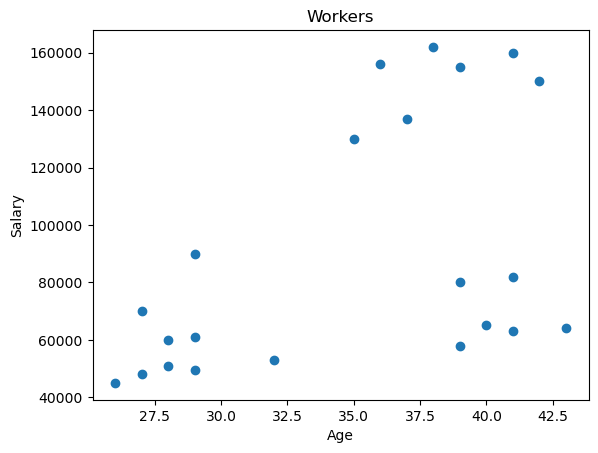

In [4]:
plt.scatter(df['Age'], df['Salary'])
plt.title('Workers')
plt.xlabel('Age')
plt.ylabel('Salary')

In [5]:
km = KMeans(n_clusters = 3)
km

KMeans(n_clusters=3)

In [8]:
y_pred = km.fit_predict(df[['Age','Salary']])
y_pred

C:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2])

In [9]:
df['cluster'] = y_pred
df

,Name,Age,Salary,cluster
0,Robin,27,70000,0
1,Michael,29,90000,0
2,John,29,61000,2
3,Ivan,28,60000,2
4,Kevin,42,150000,1
5,Gary,39,155000,1
6,David,41,160000,1
7,Andrew,38,162000,1
8,Brandi,36,156000,1
9,Angelina,35,130000,1


In [11]:
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


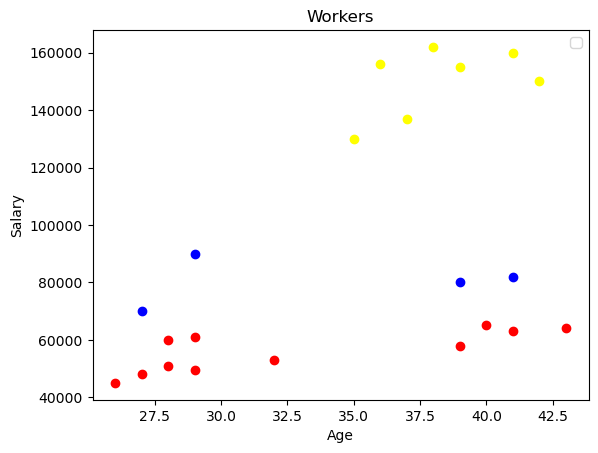

In [13]:
plt.scatter(df1['Age'], df1['Salary'], color = 'blue')
plt.scatter(df2['Age'], df2['Salary'], color = 'yellow')
plt.scatter(df3['Age'], df3['Salary'], color = 'red')

plt.title('Workers')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.legend()

In [14]:
scaler = MinMaxScaler()

In [16]:
scaler.fit(df[['Salary']])
df['Salary'] = scaler.transform(df[['Salary']])

In [17]:
scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])

In [18]:
df

,Name,Age,Salary,cluster
0,Robin,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,John,0.176471,0.136752,2
3,Ivan,0.117647,0.128205,2
4,Kevin,0.941176,0.897436,1
5,Gary,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrew,0.705882,1.000000,1
8,Brandi,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


#### Find Optimal K Value using Elbow Method

In [20]:
k_range = range(1,10)

sse = []
for k in k_range:
    km = KMeans(n_clusters = k)
    km.fit(df[['Age', 'Salary']])
    sse.append(km.inertia_)
    
    
###Inertia is the sum of square error

C:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid i

In [21]:
sse

[5.434011511988178,
 2.0911363886990775,
 0.4750783498553096,
 0.34910470944195654,
 0.26640301246684156,
 0.21055478995472493,
 0.1828491848454585,
 0.13265419827245162,
 0.10383752586603562]

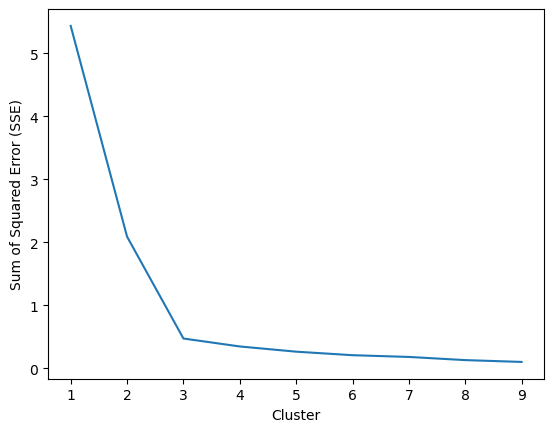

In [22]:
plt.xlabel('Cluster')
plt.ylabel('Sum of Squared Error (SSE)')
plt.plot(k_range, sse)

#### 3 has shown to be the least cluster yet least squared errors, anything after 3 shows little difference. Thus, it is not preferred

In [23]:
km = KMeans(n_clusters = 3)

y_pred = km.fit_predict(df[['Age', 'Salary']])
y_pred

C:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0])

In [24]:
df['Cluster'] = y_pred
df

,Name,Age,Salary,cluster,Cluster
0,Robin,0.058824,0.213675,0,1
1,Michael,0.176471,0.384615,0,1
2,John,0.176471,0.136752,2,1
3,Ivan,0.117647,0.128205,2,1
4,Kevin,0.941176,0.897436,1,2
5,Gary,0.764706,0.940171,1,2
6,David,0.882353,0.982906,1,2
7,Andrew,0.705882,1.000000,1,2
8,Brandi,0.588235,0.948718,1,2
9,Angelina,0.529412,0.726496,1,2


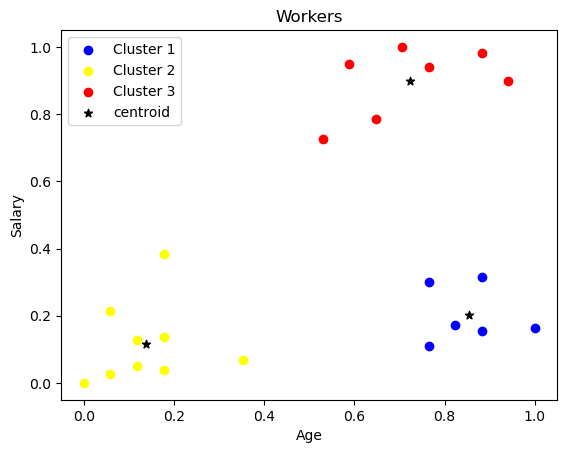

In [29]:
df1 = df[df.Cluster == 0]
df2 = df[df.Cluster == 1]
df3 = df[df.Cluster == 2]

plt.scatter(df1['Age'], df1['Salary'], color = 'blue', label = 'Cluster 1')
plt.scatter(df2['Age'], df2['Salary'], color = 'yellow', label = 'Cluster 2')
plt.scatter(df3['Age'], df3['Salary'], color = 'red', label = 'Cluster 3')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], color = 'black', marker = '*', label = 'centroid')

plt.title('Workers')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.legend()